In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as slv
import sympy as sym
import scipy.optimize as opt
from IPython.display import display, Latex

from sympy import Interval, Symbol, stationary_points

In [1]:
def display2Deq(eq1, eq2):
    s = \
    r'''$$
    \left\{
    \begin{aligned}
        %s \\
        %s
    \end{aligned}
    \right.
    $$''' % (sym.latex(eq1).replace('=','&='), sym.latex(eq2).replace('=','&='))
    display(Latex(s))

## Осциллятор Ван-дер-Поля

$$
\begin{array}{l}
\frac{d x}{d t}=y \\
\frac{d y}{d t}=\mu\left(1-x^{2}\right)y-x
\end{array}
$$

## Sympy: исследование стационарной точки

In [114]:
# создать символы и зависимости

x, y, mu, t, x0, y0 = sym.symbols("x, y, mu, t, x0, y0")
x = sym.Function('x')(t)
y = sym.Function('y')(t)

x_rate = y
y_rate = mu *(1 - x**2)*y - x

eq1 = sym.Eq(x.diff(t), x_rate)
eq2 = sym.Eq(y.diff(t), y_rate)


# стационарная точка: 

stat_points = sym.nonlinsolve([x_rate, y_rate], [x,y])
stat_points

{(0, 0)}

In [106]:
display2Deq(eq1,eq2)

<IPython.core.display.Latex object>

In [115]:
# матрица Якоби
J = sym.Matrix([x_rate, y_rate]).jacobian(sym.Matrix([x,y]))

#  собственные векторы
J_vects = J.eigenvects()

print(J_vects[0][0])
print(J_vects[1][0])



mu*(1 - x(t)**2)/2 - sqrt(mu**2*(x(t)**2 - 1)**2 - 8*mu*x(t)*y(t) - 4)/2
mu*(1 - x(t)**2)/2 + sqrt(mu**2*(x(t)**2 - 1)**2 - 8*mu*x(t)*y(t) - 4)/2


In [116]:
# ламбдифицированная функция собственных чисел

f_eigen1 = sym.lambdify([x, y, mu], sym.re(J_vects[0][0]))
f_eigen2 = sym.lambdify([x, y,  mu], sym.re(J_vects[1][0]))
f_eigen1_im = sym.lambdify([x, y, mu], sym.im(J_vects[0][0]))
f_eigen2_im = sym.lambdify([x, y,  mu], sym.im(J_vects[1][0]))


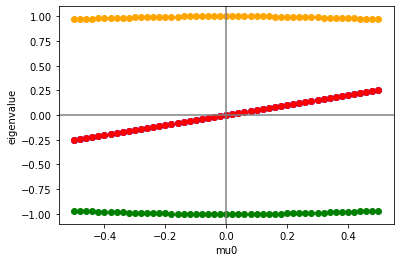

In [117]:
mus = np.linspace(-0.5,0.5, 51)
x0 = 0
y0 = 0
for mu0 in mus:

    plt.scatter(mu0, f_eigen1(0, 0, mu0), color='blue')
    plt.scatter(mu0, f_eigen2(0, 0,  mu0), color='red')
    plt.scatter(mu0, f_eigen1_im(0, 0, mu0), color='green')
    plt.scatter(mu0, f_eigen2_im(0, 0,  mu0), color='orange')


plt.xlabel("mu0")
plt.ylabel("eigenvalue")
plt.axhline(0, -1, 1, color="grey")
plt.axvline(0, -1, 1, color="grey")
plt.show()

mu < 0: устойчивый фокус  есть неустойчивый предельный цикл   
mu > 0: неустойчивый фокус + есть устойчивый предельный цикл  

## Фазовые портреты

c:\Users\Диана\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


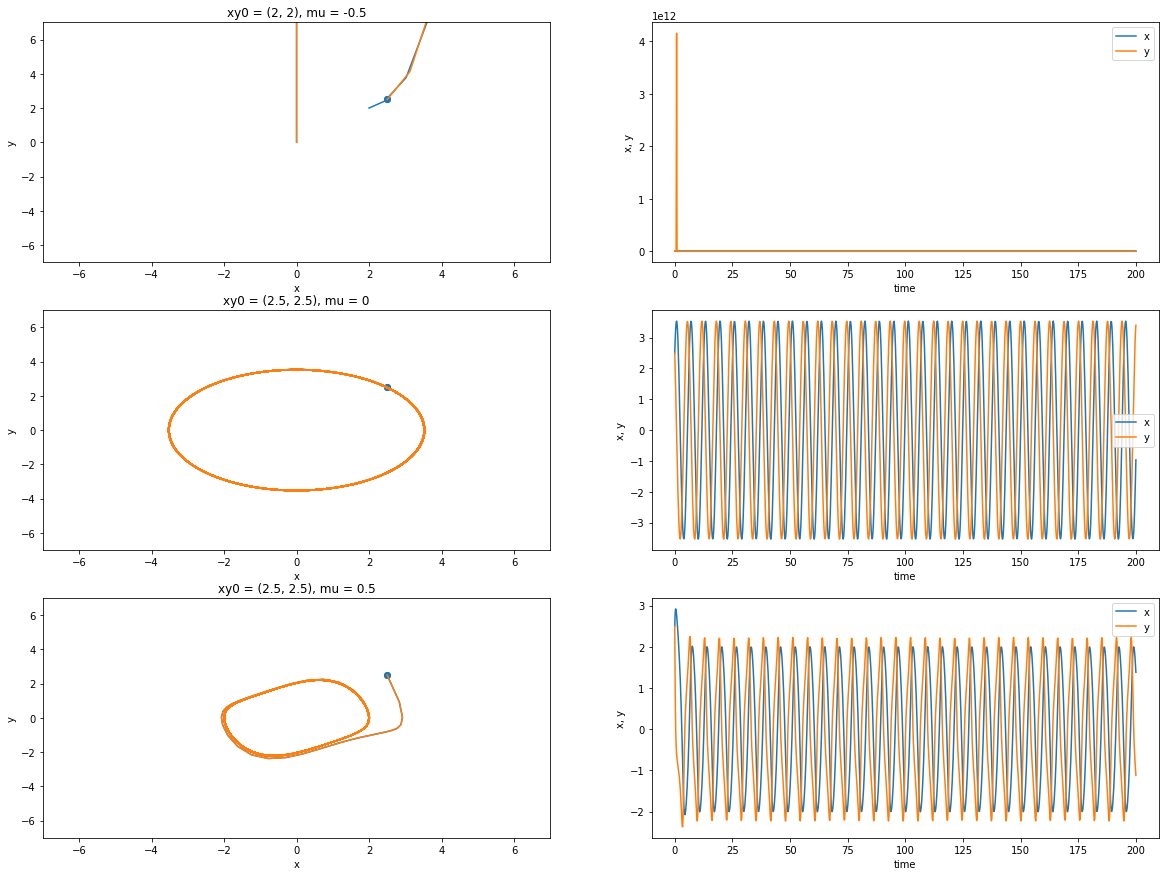

In [2]:
# функция

P = lambda x, y: y 

Q = lambda x, y, mu: mu *(1 - x**2)*y - x

fun = lambda xy, t, mu: [ P(xy[0], xy[1]), Q(xy[0], xy[1], mu)]

# фазовый портрет
# задать время
tt = np.linspace(0, 200, 1000)

xy0 = (2, 2) # исходная точка

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15)) # 

args = (-0.5, 0, 0.5)
for i in range(0, 3):
    mu = args[i]
    zz = slv.odeint(fun, xy0, tt, args=(mu, ))
    
    ax1 = axes[i, 0 ]
    ax1.plot(zz[:,0], zz[:,1])    
    ax1.set_title(f'xy0 = {xy0}, mu = {mu}')
    ax1.set_ylabel('y')
    ax1.set_xlabel('x')
    xy0 = (2.5, 2.5)
    yy  = slv.odeint(fun, xy0, tt, args=(mu, ))
    ax1.plot(yy[:,0], yy[:,1])
    ax1.scatter(xy0, xy0)
    ax1.set_ylim(-7, 7)
    ax1.set_xlim(-7, 7)

    ax2 = axes[i, 1 ]
    ax2.plot(tt, zz[:,0], label = 'x')
    ax2.plot(tt, zz[:,1], label = 'y')
    ax2.set_ylabel('x, y')
    ax2.set_xlabel('time')
    ax2.legend()